### S10 T01: Aprenentatge Supervisat

### Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/Users/Diana/Downloads/archive/DelayedFlights.csv')

In [3]:
data=data.drop_duplicates()

In [4]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
#For now, I will drop some of the columns that don't give us any substantial information (Cancelled and Diverted
#because we're looking for flight delays, if it's been cancelled no delay and if it's been diverted is delayed because
#of diversion)

airlines=data.drop(['Unnamed: 0', 'Year','FlightNum','Cancelled', 'CancellationCode', 'Diverted'], axis=1)

In [6]:
airlines.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,N712SW,128.0,...,IAD,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,N772SW,128.0,...,IAD,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,N428WN,96.0,...,IND,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,N464WN,90.0,...,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,N726SW,101.0,...,IND,JAX,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


In [7]:
#as I have trouble with large datasets (my computer is way too slow), I will apply a sample 
#for 50000 observations

airlines=airlines.sample(50000)

In [8]:
airlines.describe().round(2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,50000.00,50000.00,50000.00,50000.00,50000.00,49792.00,50000.00,49760.00,49995.0,49760.00,49760.00,50000.00,50000.00,49792.00,49989.00,32247.00,32247.00,32247.00,32247.00,32247.00
mean,6.12,15.82,3.98,1514.01,1462.98,1611.57,1633.02,133.33,134.4,108.31,42.06,43.13,766.67,6.83,18.20,18.72,3.96,14.89,0.10,25.33
std,3.48,8.78,2.00,449.55,424.07,543.31,460.57,72.25,71.6,68.86,56.91,53.71,576.29,5.35,14.16,42.48,24.17,33.45,2.05,42.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,18.00,8.0,0.00,-70.00,6.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1200.00,1130.00,1315.00,1323.00,80.00,81.0,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1543.00,1505.00,1716.00,1705.00,116.00,116.0,90.00,24.00,24.00,606.00,6.00,14.00,2.00,0.00,2.00,0.00,9.00
75%,9.00,23.00,6.00,1857.00,1815.00,2028.00,2010.00,165.00,165.0,137.00,55.00,53.00,998.00,8.00,21.00,20.00,0.00,15.00,0.00,33.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,679.00,660.0,651.00,1225.00,1233.00,4962.00,200.00,324.00,1120.00,1225.00,838.00,140.00,845.00


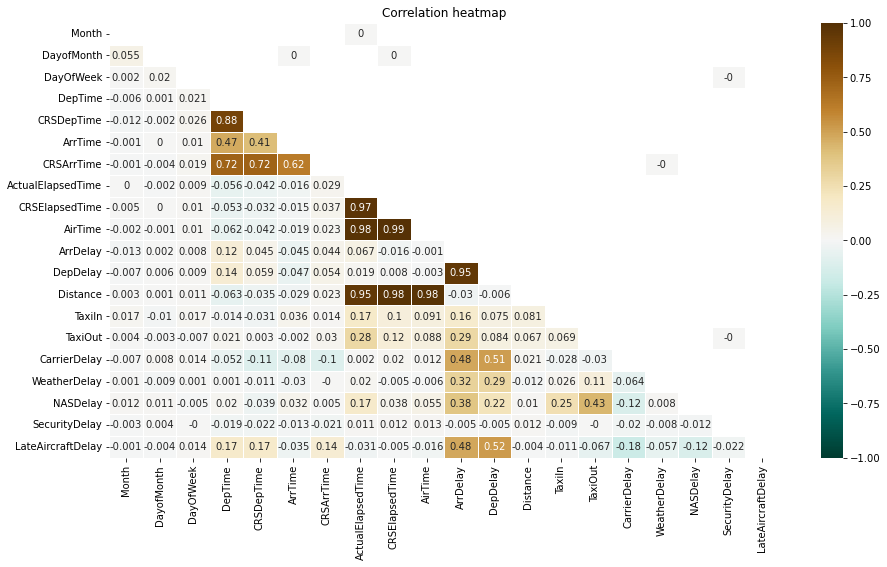

In [9]:
#visualize the correlation between variables

correl=airlines.corr().round(3)
mascara=np.triu(correl)
f, ax=plt.subplots(figsize=(15, 8))
sns.heatmap(correl, mask=mascara, annot=True, linewidths=.5,  vmin=-1, vmax=1,  cmap='BrBG_r')
ax.set_title('Correlation heatmap')
plt.show()

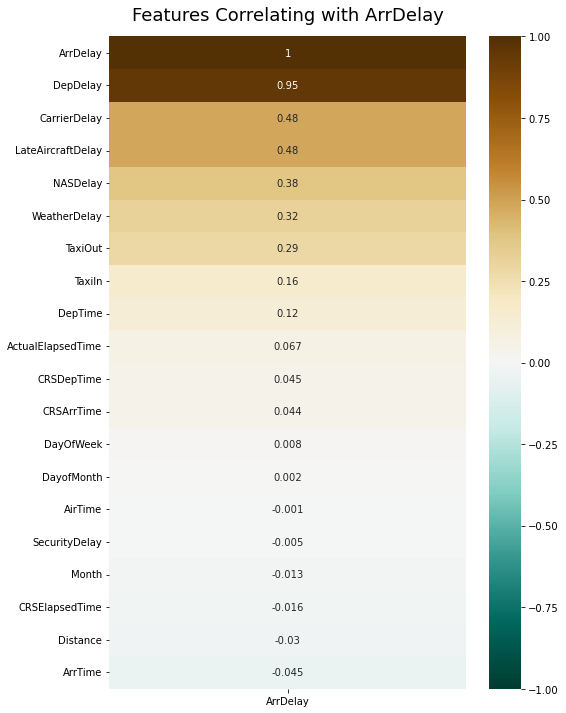

In [10]:
# Correlation of features with target ArrDelay sorted by importance
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correl[['ArrDelay']].sort_values(by='ArrDelay', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG_r')
heatmap.set_title('Features Correlating with ArrDelay', fontdict={'fontsize':18}, pad=16);

The most correlated variables with ArrDelay are DepDelay, the most, and then CarrierDelay, LateAircraftDelay. In fact, ArrDelay is the addition of all specific delays.

In [11]:
# Checking missing values
airlines.isna().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                208
CRSArrTime               0
UniqueCarrier            0
TailNum                  0
ActualElapsedTime      240
CRSElapsedTime           5
AirTime                240
ArrDelay               240
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 208
TaxiOut                 11
CarrierDelay         17753
WeatherDelay         17753
NASDelay             17753
SecurityDelay        17753
LateAircraftDelay    17753
dtype: int64

In [12]:
# Removing NaN for ArrTime, ActualElapsedTime, AirTime, TaxiIn, and TaxiOut
airlines=airlines.dropna(how='any',
                          subset=['ArrTime', 'ActualElapsedTime','AirTime','TaxiIn','TaxiOut'])

In [13]:
airlines.isna().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
CarrierDelay         17513
WeatherDelay         17513
NASDelay             17513
SecurityDelay        17513
LateAircraftDelay    17513
dtype: int64

For our model, we will only take those variables that we know when the plane is taking off and before landing.

These variables are: DepDelay, TaxiOut, DepTime, CRSElapsedTime, Distance, CRSDepTime, Month, DayofWeek, DayOfMonth, CRSArrTime, UniqueCarrier, Origin, Dest, and TailNum.

In [14]:
#As we have to considered if flights are delayed (ArrDelay>0) I'll set this condition to 1 and the rest of cases to 0.
airlines['Delayed'] = airlines['ArrDelay'] > 0
airlines['Delayed'] = airlines['Delayed'].astype(int)

In [15]:
airlines['Delayed'].value_counts()

1    44431
0     5329
Name: Delayed, dtype: int64

In [16]:
airlines_copy=airlines.copy()

In [17]:
airlines=airlines.drop(['ArrDelay'],axis=1)

In [18]:
#Categorical features
cat=['TailNum', 'UniqueCarrier', 'Dest', 'Origin']

# Numerical features (all the rest)
numeric=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'DepDelay','CRSArrTime', 
         'CRSElapsedTime', 'Distance', 'TaxiOut']

X=airlines[numeric]
y=airlines.Delayed

In [19]:
#Train-Set test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Testing Features Shape:', X_test.shape)

Training Features Shape: (39808, 9)
Testing Features Shape: (9952, 9)


**K-NN Model**

K-Nearest Neighbor calculates the distance of a new data point to all other training data points

In [20]:
#training the model and predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
#predictions

y_predKNN = classifier.predict(X_test)

In [22]:
#evaluating the algorithm

print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_predKNN))

Accuracy of KNN: 0.8844453376205788


The results show that our KNN algorithm has 88% accuracy.

**Naive Bayes**

Naive Bayes is a statistical classification technique based on Bayes Theorem. Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features.

In [23]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

#Create a Gaussian Classifier
modelGNB=GaussianNB()

# Train the model using the training sets
modelGNB.fit(X_train, y_train)

#Predict Output
y_predGNB=modelGNB.predict(X_test)

In [24]:
#Evaluating the model

print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_test, y_predGNB))

Accuracy of Naive Bayes: 0.7909967845659164


Accuracy has decreased to 79% vs. previous model.

**XGBoost**

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher.

In [25]:
import xgboost as xgb

#convert the dataset into an optimized data structure called Dmatrix

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [26]:
#instantiate an XGBoost regressor object

xg_reg = xgb.XGBClassifier(objective ='binary:logistic',use_label_encoder=False,random_state=42)

In [27]:
#fitting model

xg_reg.fit(X_train,y_train)

y_predxg=xg_reg.predict(X_test)

[15:46:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
print("Accuracy of XGBoost:",metrics.accuracy_score(y_test, y_predxg))

Accuracy of XGBoost: 0.9030345659163987


XGBoost is the model with the best accuracy of the three reaching 90.3%

### Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

**Accuracy**

In [29]:
print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_predKNN))
print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_test, y_predGNB))
print("Accuracy of XGBoost:",metrics.accuracy_score(y_test, y_predxg))

Accuracy of KNN: 0.8844453376205788
Accuracy of Naive Bayes: 0.7909967845659164
Accuracy of XGBoost: 0.9030345659163987


The best model as we have stated before is XGBoost.

**Confussion Matrix**

In [30]:
cm_KNN=metrics.confusion_matrix(y_test, y_predKNN)
print('Confusion Matrix of KNN: ', cm_KNN)

Confusion Matrix of KNN:  [[ 127  931]
 [ 219 8675]]


In [31]:
cm_GNB=metrics.confusion_matrix(y_test, y_predGNB)
print('Confusion Matrix of Naive Bayes: ', cm_GNB)

Confusion Matrix of Naive Bayes:  [[ 872  186]
 [1894 7000]]


In [32]:
cm_XGBoost=metrics.confusion_matrix(y_test, y_predxg)
print('Confusion Matrix of XGBoost: ', cm_XGBoost)

Confusion Matrix of XGBoost:  [[ 402  656]
 [ 309 8585]]


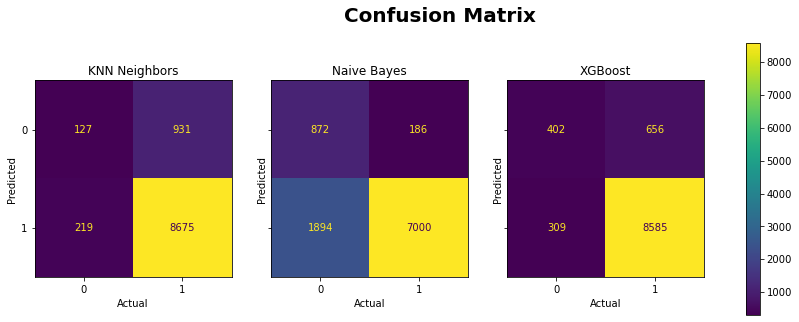

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey='row')

cmview = metrics.ConfusionMatrixDisplay(cm_KNN)
cmview.plot(ax=ax[0])
cmview.ax_.set(title='KNN Neighbors',xlabel='Actual',ylabel='Predicted')
cmview.im_.colorbar.remove()

cmview = metrics.ConfusionMatrixDisplay(cm_GNB)
cmview.plot(ax=ax[1])
cmview.ax_.set(title='Naive Bayes',xlabel='Actual',ylabel='Predicted')
cmview.im_.colorbar.remove()
   
cmview = metrics.ConfusionMatrixDisplay(cm_XGBoost)
cmview.plot(ax=ax[2])
cmview.ax_.set(title='XGBoost',xlabel='Actual',ylabel='Predicted')
cmview.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.20, hspace=0.1)
fig.colorbar(cmview.im_, ax=ax)
fig.suptitle('Confusion Matrix', fontsize = 20, fontweight = "bold", ha='center')
plt.show()

- True Positive (TP) is higher on Naive Bayes and XGBoost
- True Negative (TN) is lower on those two, especially in Naive Bayes
- False Positive (FP) is higher in KNN Neighbors and better in Naive Bayes
- False Negative (FN) is higher in Naive Bayes.

So the best models:
Naive Bayes: have higher TP, less TN, less FP but important to say higher FN.
XG Boost: less TP than Naive but better than KNN, higher TN, more FP, but at the same time less FN.

As I consider FN an important metric (it's better a False Negative than a False Positive), I would say that XG Boost is the best of all three models.


**F1 Score**

F1 score is the weighted average of precision and recall. F1 score is a more useful measure than accuracy for problems with uneven class distribution because it takes into account both false positive and false negatives.

The best value for f1 score is 1 and the worst is 0.

In [34]:
f1_KNN=metrics.f1_score(y_test, y_predKNN)
print('F1 Score for KNN: ', f1_KNN)

F1 Score for KNN:  0.9378378378378379


In [35]:
f1_GNB=metrics.f1_score(y_test, y_predGNB)
print('F1 Score for Naive Bayes: ',f1_GNB)

F1 Score for Naive Bayes:  0.8706467661691543


In [36]:
f1_XG=metrics.f1_score(y_test, y_predxg)
print('F1 Score for XGBoost: ', f1_XG)

F1 Score for XGBoost:  0.9467879790460435


The best of all three models is XGBoost.

**Precision**

In [37]:
pres_KNN=metrics.precision_score(y_test, y_predKNN)
print('Precision for KNN: ', pres_KNN)

Precision for KNN:  0.9030814074536748


In [38]:
pres_GNB=metrics.precision_score(y_test, y_predGNB)
print('Precision for Naive Bayes: ', pres_GNB)

Precision for Naive Bayes:  0.9741163373225716


In [39]:
pres_XG=metrics.precision_score(y_test, y_predxg)
print('Precision for XGBoost: ', pres_XG)

Precision for XGBoost:  0.9290120116870468


The most precise model is Naive Bayes.

**AUC**

In [40]:
auc_KNN=metrics.roc_auc_score(y_test, y_predKNN)
print('AUC for KNN: ', auc_KNN)

AUC for KNN:  0.5477072328023862


In [41]:
auc_GNB=metrics.roc_auc_score(y_test, y_predGNB)
print('AUC for Naive Bayes: ', auc_GNB)

AUC for Naive Bayes:  0.8056220225355297


In [42]:
auc_XG=metrics.roc_auc_score(y_test, y_predxg)
print('AUC for XGBoost: ', auc_XG)

AUC for XGBoost:  0.6726098348836942


Naive Bayes is the best of all three models.

## Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

**K-NN Model**

In [43]:
#I will train the model adding these parameters: weights='distance'-->weight points by the inverse of their distance 
#(closer neighbors of a query point will have a greater influence than neighbors which are further away
#algorithm='ball_tree'
#and changing n_neighbors to 2

classifier=KNeighborsClassifier(n_neighbors=2, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [44]:
y_predKNN2 = classifier.predict(X_test)

**Naive Bayes**

In [45]:
#adding var_smoothing parameter: loat value provided will be used to calculate the largest 
#variances of each feature and add it to the stability calculation variance

modelGNB=GaussianNB(var_smoothing=2.0)

modelGNB.fit(X_train, y_train)

#Predict Output
y_predGNB=modelGNB.predict(X_test)

**XG Boost**

In [46]:
#added: max_depth=5 (default is 6)--> Maximum depth of a tree
#added: min_child_weight=3 Minimum sum of instance weight (hessian) needed in a child

xg_reg=xgb.XGBClassifier(objective ='binary:logistic', use_label_encoder=False, random_state=42, max_depth=5, 
                         min_child_weight=3)

xg_reg.fit(X_train,y_train)
y_predxg=xg_reg.predict(X_test)

[15:46:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

In [47]:
#I will use cross-validation
from sklearn.model_selection import cross_val_score

print('K-NN Model:', cross_val_score(classifier, X, y, cv=3))
print('Naive Bayes:', cross_val_score(modelGNB, X, y, cv=3))
print('XGBoost:', cross_val_score(xg_reg, X, y, cv=3))

K-NN Model: [0.84927956 0.84747091 0.85132039]
Naive Bayes: [0.8929282  0.89286791 0.89292174]
[15:46:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: [0.90534756 0.90426237 0.90696973]


Before changing parameters in our models, we had this accuracy for each model: 
    
- Accuracy of KNN: 0.8765692477653911

- Accuracy of Naive Bayes: 0.7837702119112182

- Accuracy of XGBoost: 0.9018780757256202
    
Now, with the changes, we can say that we have lost accuracy for K-NN Model, improved for Naive Bayes, and also improved for XGBoost.

### Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.

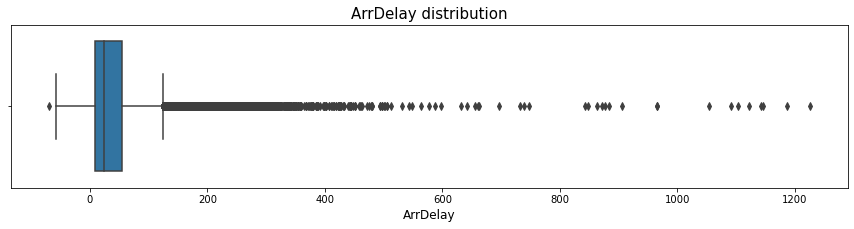

In [48]:
plt.figure(figsize=(15,3))
plt.title("ArrDelay distribution",fontsize=15)
plt.xlabel("ArrDelay",fontsize=12)
ax=sns.boxplot(airlines_copy['ArrDelay'])

In [49]:
#I will delete outliers
Q1=airlines_copy['ArrDelay'].quantile(q=0.25)
Q3=airlines_copy['ArrDelay'].quantile(q=0.75)
print(Q1, Q3)

9.0 55.0


In [50]:
#If I set to 9 the min value I won't get any non delay observations to train the model and will be overfitted

new_airlines=airlines_copy[(airlines_copy['ArrDelay'] >= 0) & (airlines_copy['ArrDelay'] <= 56)]

In [51]:
new_airlines['Delayed'].value_counts()

1    32259
0      737
Name: Delayed, dtype: int64

In [52]:
airlines2=new_airlines

In [53]:
new_airlines=new_airlines.drop(['ArrDelay'],axis=1)

In [54]:
#shape of airlines dataset with outliers

airlines_copy.shape

(49760, 25)

In [55]:
#shape of airlines dataset after removing outliers

new_airlines.shape

(32996, 24)

In [56]:
#Categorical features
cat=['TailNum', 'UniqueCarrier', 'Dest', 'Origin']

# Numerical features (all the rest)
numeric=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'DepDelay','CRSArrTime', 
         'CRSElapsedTime', 'Distance', 'TaxiOut']

X=new_airlines[numeric]
y=new_airlines.Delayed

In [57]:
#Apply SMOTE for balancing variables

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1, sampling_strategy = 'minority')

In [58]:
print(X.shape)
print(y.shape)

(32996, 9)
(32996,)


In [59]:
#Train-Set test

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Testing Features Shape:', X_test.shape)

Training Features Shape: (26396, 9)
Testing Features Shape: (6600, 9)


**K-NN Model**

In [60]:
#training the model and predictions

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
#predictions

y_predKNN = classifier.predict(X_test)

**Naive Bayes**

In [62]:
#Create a Gaussian Classifier
modelGNB=GaussianNB()

# Train the model using the training sets
modelGNB.fit(X_train, y_train)

#Predict Output
y_predGNB=modelGNB.predict(X_test)

**XG Boost**

In [63]:
#convert the dataset into an optimized data structure called Dmatrix

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [64]:
#instantiate an XGBoost regressor object

xg_reg = xgb.XGBClassifier(objective ='binary:logistic',random_state=42)

In [65]:
#fitting model

xg_reg.fit(X_train,y_train)

y_predxg=xg_reg.predict(X_test)

[15:47:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Initial accuracy values:

- Accuracy of KNN: 0.8808472194338486
- Accuracy of Naive Bayes: 0.7850833166030917
- Accuracy of XGBoost: 0.9072475406544871

In [66]:
#accuracy
print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_predKNN))
print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_test, y_predGNB))
print("Accuracy of XGBoost:",metrics.accuracy_score(y_test, y_predxg))

Accuracy of KNN: 0.9768181818181818
Accuracy of Naive Bayes: 0.9766666666666667
Accuracy of XGBoost: 0.9757575757575757


Without outliers our model has improved significantly in all the models.

### Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [67]:
airlines2.drop('DepDelay',axis=1, inplace=True)

In [68]:
# Numerical features
numeric=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime','CRSArrTime', 
         'CRSElapsedTime', 'Distance', 'TaxiOut']

X=airlines2[numeric]
y=airlines2.Delayed

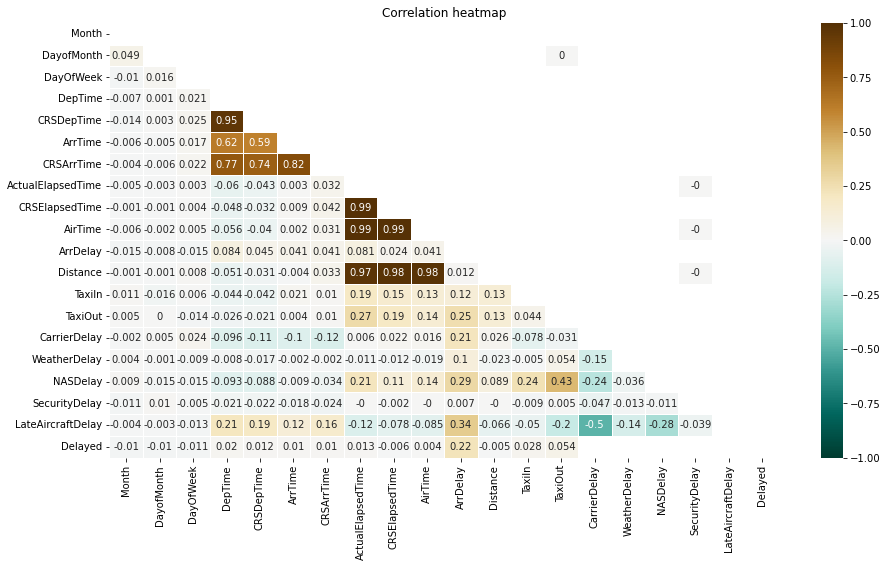

In [69]:
correl=airlines2.corr().round(3)
mascara=np.triu(correl)
f, ax=plt.subplots(figsize=(15, 8))
sns.heatmap(correl, mask=mascara, annot=True, linewidths=.5,  vmin=-1, vmax=1,  cmap='BrBG_r')
ax.set_title('Correlation heatmap')
plt.show()

In [70]:
numeric=['Month', 'DayofMonth', 'DayOfWeek','DepDelay','CRSArrTime', 
         'CRSElapsedTime', 'Distance', 'TaxiOut']

X=airlines[numeric]
y=airlines.Delayed

In [71]:
#Apply SMOTE for balancing variables

smote = SMOTE(random_state=1, sampling_strategy = 'minority')

In [72]:
print(X.shape)
print(y.shape)

(49760, 8)
(49760,)


In [73]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Testing Features Shape:', X_test.shape)

Training Features Shape: (39808, 8)
Testing Features Shape: (9952, 8)


**K-NN Model**

In [74]:
#training the model and predictions

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
#predictions

y_predKNN = classifier.predict(X_test)

**Naive Bayes**

In [76]:
#Create a Gaussian Classifier
modelGNB=GaussianNB()

# Train the model using the training sets
modelGNB.fit(X_train, y_train)

#Predict Output
y_predGNB=modelGNB.predict(X_test)

**XG Boost**

In [77]:
#convert the dataset into an optimized data structure called Dmatrix

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [78]:
#instantiate an XGBoost regressor object

xg_reg = xgb.XGBClassifier(objective ='binary:logistic',random_state=42)

In [79]:
#fitting model

xg_reg.fit(X_train,y_train)

y_predxg=xg_reg.predict(X_test)

[15:47:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
#accuracy
print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_predKNN))
print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_test, y_predGNB))
print("Accuracy of XGBoost:",metrics.accuracy_score(y_test, y_predxg))

Accuracy of KNN: 0.8836414790996785
Accuracy of Naive Bayes: 0.7902934083601286
Accuracy of XGBoost: 0.903637459807074


Even though we don't have DepDelay variable we've got a pretty decent accuracy values being XGBoost the most accurate model.